In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

missing_values = ["Free"]
df = pd.read_csv("WebDevelopment.csv",na_values = missing_values)

In [2]:
df.head()
df[['price','numSubscribers','numPublishedLectures','instructionalLevel','contentInfo']]

,price,numSubscribers,numPublishedLectures,instructionalLevel,contentInfo
0,75.0,43285,24,All Levels,4 hours
1,50.0,47886,125,All Levels,12.5 hours
2,50.0,2577,64,All Levels,4.5 hours
3,60.0,8777,75,Intermediate Level,15.5 hours
4,20.0,23764,58,Beginner Level,5.5 hours
5,40.0,3541,37,Beginner Level,4 hours
6,50.0,2669,72,Intermediate Level,5.5 hours
7,150.0,1966,65,All Levels,5 hours
8,200.0,4090,348,All Levels,19.5 hours
9,40.0,2578,39,Beginner Level,5.5 hours


In [3]:
def check_values(column):
    '''
    Takes in the column header of the data as a list and prints out the number of standard missing values
    '''
    for i in range(len(column)):
        count = 0
        print(column[i])
        for j in df[column[i]].isnull():
            if j == True:
                count+=1
        print(count)

check_values(list(df[['price','numSubscribers','numPublishedLectures','instructionalLevel','contentInfo']]))
# Detecting numbers 
cnt=0
for row in df['price']:
    try:
        int(row)        
    except ValueError:
        df.loc[cnt, 'price']=0#np.nan
    cnt+=1

price
133
numSubscribers
0
numPublishedLectures
0
instructionalLevel
0
contentInfo
0


In [4]:
#Use regex to remove "hours" and "mins" from "contentInfo" column
import re
for i in range(len(df['contentInfo'])):
    df['contentInfo'][i] = re.sub(" hours| hour| mins", "", df['contentInfo'][i])

print(df['contentInfo'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0          4
1       12.5
2        4.5
3       15.5
4        5.5
5          4
6        5.5
7          5
8       19.5
9        5.5
10         7
11         6
12       1.5
13         4
14       3.5
15        12
16         3
17       1.5
18         3
19         4
20         5
21         6
22      32.5
23         1
24       9.5
25         9
26       7.5
27      18.5
28         5
29        19
        ... 
1170       2
1171      31
1172      14
1173     4.5
1174      10
1175     1.5
1176     5.5
1177      37
1178       1
1179     2.5
1180    15.5
1181       2
1182     1.5
1183     3.5
1184     3.5
1185     8.5
1186       1
1187       2
1188      37
1189      30
1190      35
1191     2.5
1192       1
1193     1.5
1194    15.5
1195       2
1196     3.5
1197     3.5
1198       3
1199       2
Name: contentInfo, Length: 1200, dtype: object


In [5]:
#Replaces the content of "instructionalLevel" column with equivalent numerical representations
S1 = set(df['instructionalLevel'])
print(list(S1))
for n,item in enumerate(df['instructionalLevel']):
    if item == "All Levels":
        df['instructionalLevel'][n] = 0
    elif item == "Beginner Level":
        df['instructionalLevel'][n] = 1
    elif item == "Intermediate Level":
        df['instructionalLevel'][n] = 2
    else:
        df['instructionalLevel'][n] = 3
    
#print(df['instructionalLevel'])

['All Levels', 'Intermediate Level', 'Expert Level', 'Beginner Level']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is tryi

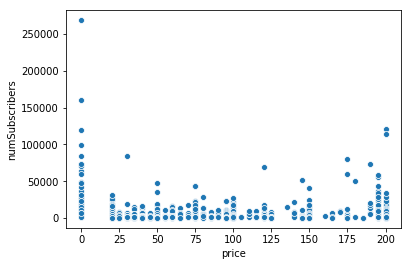

In [6]:
data = df[['price','numSubscribers','numPublishedLectures','contentInfo','instructionalLevel']]
#tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="price", y="numSubscribers", data=data)

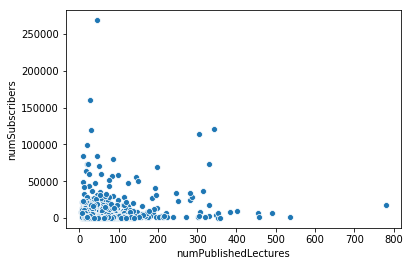

In [7]:
bx = sns.scatterplot(x="numPublishedLectures", y="numSubscribers", data=data)

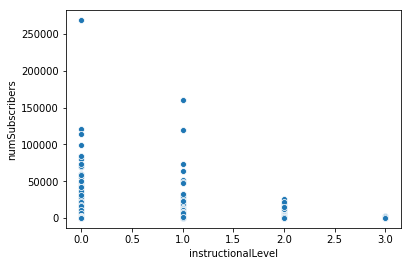

In [8]:
cx = sns.scatterplot(x="instructionalLevel", y="numSubscribers", data=data)